In [12]:
from pygraph.classes.digraph import digraph


class PRIterator:
    __doc__ = '''计算一张图中的PR值'''

    def __init__(self, dg):
        self.damping_factor = 0.85  # 阻尼系数,即α
        self.max_iterations = 100  # 最大迭代次数
        self.min_delta = 0.00001  # 确定迭代是否结束的参数,即ϵ
        self.graph = dg

    def page_rank(self):
        #  先将图中没有出链的节点改为对所有节点都有出链
        for node in self.graph.nodes():
            if len(self.graph.neighbors(node)) == 0:
                for node2 in self.graph.nodes():
                    digraph.add_edge(self.graph, (node, node2))

        nodes = self.graph.nodes()
        graph_size = len(nodes)

        if graph_size == 0:
            return {}
        page_rank = dict.fromkeys(nodes, 1.0 / graph_size)  # 给每个节点赋予初始的PR值
        damping_value = (1.0 - self.damping_factor) / graph_size  # 公式中的(1−α)/N部分

        flag = False
        for i in range(self.max_iterations):
            change = 0
            for node in nodes:
                rank = 0
                for incident_page in self.graph.incidents(node):  # 遍历所有“入射”的页面
                    rank += self.damping_factor * (page_rank[incident_page] / len(self.graph.neighbors(incident_page)))
                rank += damping_value
                change += abs(page_rank[node] - rank)  # 绝对值
                page_rank[node] = rank

            print("This is NO.%s iteration" % (i + 1))
            print(page_rank)

            if change < self.min_delta:
                flag = True
                break
        if flag:
            print("finished in %s iterations!" % node)
        else:
            print("finished out of 100 iterations!")
        return page_rank


if __name__ == '__main__':
    dg = digraph()

    dg.add_nodes(["A", "B", "C", "D", "E"])

    dg.add_edge(("A", "B"))
    dg.add_edge(("A", "C"))
    dg.add_edge(("A", "D"))
    dg.add_edge(("B", "D"))
    dg.add_edge(("C", "E"))
    dg.add_edge(("D", "E"))
    dg.add_edge(("B", "E"))
    dg.add_edge(("E", "A"))

    pr = PRIterator(dg)
    page_ranks = pr.page_rank()

    print("The final page rank is\n", page_ranks)

SyntaxError: invalid syntax (kocay_algorithm.py, line 1061)

In [8]:
import numpy as np

class CPageRank(object):
    '''实现PageRank Alogrithm
    '''

    def __init__(self):
        self.PR = []  # PageRank值

    def GetPR(self, IOS, alpha, max_itrs, min_delta):
        '''幂迭代方法求PR值
        :param IOS       表示网页出链入链关系的矩阵,是一个左出链矩阵
        :param alpha     阻尼系数α，一般alpha取值0.85
        :param max_itrs  最大迭代次数
        :param min_delta 停止迭代的阈值
        '''
        # IOS左出链矩阵, a阻尼系数alpha, N网页总数
        N = np.shape(IOS)[0]
        # 所有分量都为1的列向量
        e = np.ones(shape=(N, 1))
        # 计算网页出链个数统计
        L = [np.count_nonzero(e) for e in IOS.T]
        # 计算网页PR贡献矩阵helpS，是一个左贡献矩阵
        helps_efunc = lambda ios, l: ios / l
        helps_func = np.frompyfunc(helps_efunc, 2, 1)
        helpS = helps_func(IOS, L)
        # P[n+1] = AP[n]中的矩阵A
        A = alpha * helpS + ((1 - alpha) / N) * np.dot(e, e.T)
#         print('左出链矩阵:\n', IOS)
#         print('左PR值贡献概率矩阵:\n',helpS)`````````
        # 幂迭代法求PR值
        for i in range(max_itrs):
            if 0 == np.shape(self.PR)[0]:  # 使用1.0/N初始化PR值表
                self.PR = np.full(shape=(N, 1), fill_value=1.0 / N)
                print('初始化的PR值表:', self.PR)
            # 使用PR[n+1] = APR[n]递推公式，求PR[n+1]
            old_PR = self.PR
            self.PR = np.dot(A, self.PR)
            # 如果所有网页PR值的前后误差 都小于 自定义的误差阈值，则停止迭代
            D = np.array([old - new for old, new in zip(old_PR, self.PR)])
            ret = [e < min_delta for e in D]
            if ret.count(True) == N:
                print('迭代次数:%d, succeed PR:\n' % (i + 1), self.PR)
                break
        return self.PR


def CPageRank_manual():
    # 表示网页之间的出入链的关系矩阵，是一个左关系矩阵，可以理解成右入链矩阵
    # IOS[i, j]表示网页j对网页i有出链
    IOS = np.array([[0, 0, 0, 0, 1],
                    [1, 0, 0, 0, 0],
                    [1, 0, 0, 0, 0],
                    [1, 1, 0, 0, 0],
                    [0, 1, 1, 1, 0]], dtype=float)
    pg = CPageRank()
    ret = pg.GetPR(IOS, alpha=0.85, max_itrs=100, min_delta=0.0001)
    print('最终的PR值:\n', ret)

In [28]:
# 输入为一个*.txt文件，例如
# A B
# B C
# B A
# ...表示前者指向后者
 
import numpy as np
 
if __name__ == '__main__':
 
    # 读入有向图，存储边
    f = open('F:/新建文本文档.txt', 'r')
    edges = [line.strip('\n').split(' ') for line in f]
    print(edges)
 
    # 根据边获取节点的集合
    nodes = []
    for edge in edges:
        if edge[0] not in nodes:
            nodes.append(edge[0])
        if edge[1] not in nodes:
            nodes.append(edge[1])
    print(nodes)
 
    N = len(nodes)
 
    # 将节点符号（字母），映射成阿拉伯数字，便于后面生成A矩阵/S矩阵
    i = 0
    node_to_num = {}
    for node in nodes:
        node_to_num[node] = i
        i += 1
    for edge in edges:
        edge[0] = node_to_num[edge[0]]
        edge[1] = node_to_num[edge[1]]
    print(edges)
 
    # 生成初步的S矩阵
    S = np.zeros([N, N])
    for edge in edges:
        S[edge[1], edge[0]] = 1
    print(S)
 
    # 计算比例：即一个网页对其他网页的PageRank值的贡献，即进行列的归一化处理
    for j in range(N):
        sum_of_col = sum(S[:,j])
        for i in range(N):
            S[i, j] /= sum_of_col
    print(S)
 
    # 计算矩阵A
    alpha = 0.85
    A = alpha*S + (1-alpha) / N * np.ones([N, N])
    print(A)
 
    # 生成初始的PageRank值，记录在P_n中，P_n和P_n1均用于迭代
    P_n = np.ones(N) / N
    P_n1 = np.zeros(N)
 
    e = 100000  # 误差初始化
    k = 0   # 记录迭代次数
    print('loop...')
 
    while e > 0.00000001:   # 开始迭代
        P_n1 = np.dot(A, P_n)   # 迭代公式
        e = P_n1-P_n
        e = max(map(abs, e))    # 计算误差
        P_n = P_n1
        k += 1
        print('iteration %s:'%str(k), P_n1)
 
    print('final result:', P_n)

[['A', 'B'], ['A', 'C'], ['A', 'D'], ['B', 'D'], ['C', 'E'], ['D', 'E'], ['B', 'E'], ['E', 'A']]
['A', 'B', 'C', 'D', 'E']
[[0, 1], [0, 2], [0, 3], [1, 3], [2, 4], [3, 4], [1, 4], [4, 0]]
[[0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [0. 1. 1. 1. 0.]]
[[0.         0.         0.         0.         1.        ]
 [0.33333333 0.         0.         0.         0.        ]
 [0.33333333 0.         0.         0.         0.        ]
 [0.33333333 0.5        0.         0.         0.        ]
 [0.         0.5        1.         1.         0.        ]]
[[0.03       0.03       0.03       0.03       0.88      ]
 [0.31333333 0.03       0.03       0.03       0.03      ]
 [0.31333333 0.03       0.03       0.03       0.03      ]
 [0.31333333 0.455      0.03       0.03       0.03      ]
 [0.03       0.455      0.88       0.88       0.03      ]]
loop...
iteration 1: [0.2        0.08666667 0.08666667 0.17166667 0.455     ]
iteration 2: [0.41675    0.08666667 0.08666667 0.1235     0.2

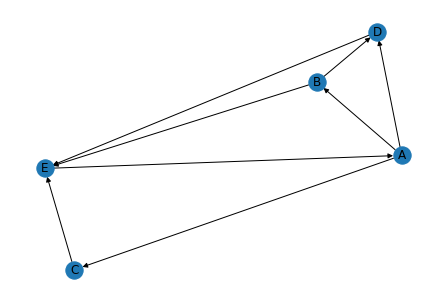

In [30]:

import networkx as nx
import matplotlib.pyplot as plt
 
if __name__ == '__main__':
 
    # 读入有向图，存储边
    f = open('F:/新建文本文档.txt', 'r')
    edges = [line.strip('\n').split(' ') for line in f]
 
    G = nx.DiGraph()
    for edge in edges:
        G.add_edge(edge[0], edge[1])
    nx.draw(G, with_labels=True)
    plt.show()

In [31]:
f = open('F:/新建文本文档.txt', 'r')
edges = [line.strip('\n').split(' ') for line in f]
print(edges)

[['A', 'B'], ['A', 'C'], ['A', 'D'], ['B', 'D'], ['C', 'E'], ['D', 'E'], ['B', 'E'], ['E', 'A']]


In [32]:
# 根据边获取节点的集合
nodes = []
for edge in edges:
    if edge[0] not in nodes:
        nodes.append(edge[0])
    if edge[1] not in nodes:
        nodes.append(edge[1])
print(nodes)

['A', 'B', 'C', 'D', 'E']


In [33]:
N = len(nodes)

# 将节点符号（字母），映射成阿拉伯数字，便于后面生成A矩阵/S矩阵
i = 0
node_to_num = {}
for node in nodes:
    node_to_num[node] = i
    i += 1
for edge in edges:
    edge[0] = node_to_num[edge[0]]
    edge[1] = node_to_num[edge[1]]
print(edges)

[[0, 1], [0, 2], [0, 3], [1, 3], [2, 4], [3, 4], [1, 4], [4, 0]]


In [43]:
edge[0]

4

In [48]:
for edge in edges:
    print(edge)

[0, 1]
[0, 2]
[0, 3]
[1, 3]
[2, 4]
[3, 4]
[1, 4]
[4, 0]


In [51]:
S = np.zeros([N, N])
S

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [53]:
S[1, 0] = 1
S

array([[0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [36]:
S = np.zeros([N, N])
for edge in edges:
    S[edge[1], edge[0]] = 1
print(S)

[[0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [0. 1. 1. 1. 0.]]


In [37]:
# 计算比例：即一个网页对其他网页的PageRank值的贡献，即进行列的归一化处理
for j in range(N):
    sum_of_col = sum(S[:,j])
    for i in range(N):
        S[i, j] /= sum_of_col
print(S)

[[0.         0.         0.         0.         1.        ]
 [0.33333333 0.         0.         0.         0.        ]
 [0.33333333 0.         0.         0.         0.        ]
 [0.33333333 0.5        0.         0.         0.        ]
 [0.         0.5        1.         1.         0.        ]]
